In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# CNN 입력에 맞게 shape 변환 (batch, 28, 28, 1)
x_train = x_train[..., tf.newaxis]  # (60000, 28, 28, 1)
x_test  = x_test[..., tf.newaxis]   # (10000, 28, 28, 1)

In [6]:
# 레이블 원-핫 인코딩
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat  = to_categorical(y_test, num_classes=10)

print(f"훈련 데이터 형태: {x_train.shape}")
print(f"테스트 데이터 형태: {x_test.shape}")

훈련 데이터 형태: (60000, 28, 28, 1)
테스트 데이터 형태: (10000, 28, 28, 1)


In [7]:
# CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [9]:
# 모델 학습
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.2,
    epochs=15,
    batch_size=64,
    verbose=1
)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.8614 - loss: 0.4547 - val_accuracy: 0.9813 - val_loss: 0.0667
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step - accuracy: 0.9797 - loss: 0.0650 - val_accuracy: 0.9878 - val_loss: 0.0445
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.9864 - loss: 0.0429 - val_accuracy: 0.9864 - val_loss: 0.0459
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9893 - loss: 0.0315 - val_accuracy: 0.9891 - val_loss: 0.0384
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.9928 - loss: 0.0232 - val_accuracy: 0.9894 - val_loss: 0.0375
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9943 - loss: 0.0189 - val_accuracy: 0.9908 - val_loss: 0.0363
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 0.9909 - val_loss: 0.0350
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9961 - loss: 0.0121 - 

In [10]:
# 예측
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test_cat, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [11]:
# 학습 곡선 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

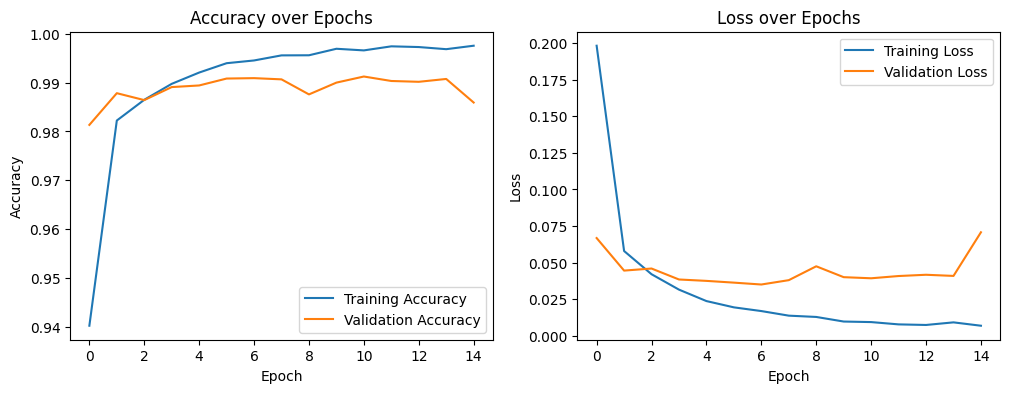

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

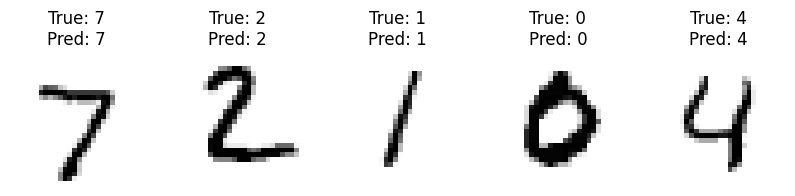

In [13]:
# 예측 결과 중 일부 이미지와 함께 출력
n_images = 5
plt.figure(figsize=(10, 4))
for i in range(n_images):
    ax = plt.subplot(1, n_images, i + 1)
    image = x_test[i].reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f"True: {y_test_class[i]}\nPred: {y_pred_class[i]}")
    plt.axis('off')
plt.show()

In [14]:
# 예측 값에 대한 정확도 확인
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.92      1.00      0.96      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 975    0    4    0    0    0    0    1    0    0]
 [   0 1130    3    0    0    0    2    0    0    0]
 [   0    0 1031    0    0    0    0    1    0    0]
 [   0    0   18  987    0    3    0    1    1    0]
 [   1    1    4    0  957   